In [1]:
pip install pandas scikit-learn imbalanced-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in ./anaconda3/lib/python3.7/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda update scikit-learn


Solving environment: - 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.22.1=py37hd81dba3_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imbalanced-learn==0.6.2


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [8]:
df = pd.read_csv('/home/riddhi/archive(1)/creditcard.csv')

In [9]:
# View the first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
# Check for null values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Check class distribution
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


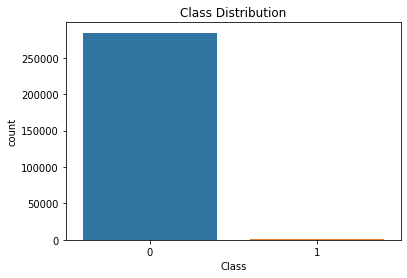

In [12]:
# Visualizing class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [13]:
# Data Preprocessing
# Scale 'Amount' column and drop 'Time' if present
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

if 'Time' in df.columns:
    df = df.drop(['Time'], axis=1)

In [14]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
# Handle Imbalanced Data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
# Check new class distribution after SMOTE
print(pd.Series(y_train_res).value_counts())


1    199020
0    199020
Name: Class, dtype: int64


In [18]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

In [24]:
# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [25]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel Evaluation: {model_name}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC Score: {roc_auc:.4f}")

In [26]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


Model Evaluation: Logistic Regression
[[83330  1965]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC Score: 0.9277


In [27]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")



Model Evaluation: Random Forest
[[85280    15]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.8918


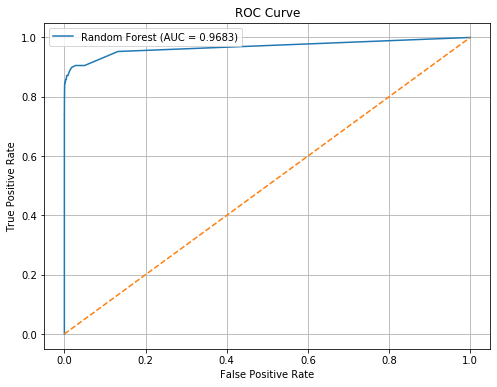

In [28]:
# Plot ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.4f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()